<a href="https://colab.research.google.com/github/mkotemp/fastai/blob/main/NEW_MKO's_own_demi_courtney_of_is_it_a_bird_updated_version_dec_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Is it a bird?

#MKO NOTE 6/16/2024:
This is a version of 'is it a bird' that works (the version found in the course doesn't run for me). I found this notebook after searching the fast.ai forums. I put a 'mkotemp' to denote where I see there were changes to the code from the original version.




In [7]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [8]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os

#mko updated below:
#iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

#if iskaggle:
!pip install -U duckduckgo_search
!pip install fastai
!pip install fastbook

In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "bird photos"
1. Use DuckDuckGo to search for images of "forest photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of birds and non-birds

In [9]:
from fastbook import *
from fastai.vision.widgets import *

#mko note: this code is using 'search_images_ddg', rather than 'ddg_images'
#mko note: return L(ddg_images(term, max_results=max_images)).itemgot('image')
def search_images(term, max_images=100):  #mko note: upped the pictures from 30 to 100 because was underfitting and too high an error rate
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


Let's start by searching for a bird photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [10]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('demi moore photos', max_images=1)
urls[0]

Searching for 'demi moore photos'


'https://www.hawtcelebs.com/wp-content/uploads/2022/09/demi-moore-on-the-set-of-the-substance-in-antibes-09-13-2022-9.jpg'

...and then download a URL and take a look at it:

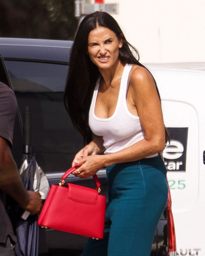

In [11]:
from fastdownload import download_url
dest = 'demi_moore.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "forest photos":

Searching for 'courtney cox photos'


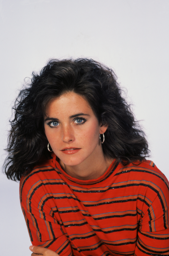

In [12]:
download_url(search_images('courtney cox photos', max_images=1)[0], 'courtney_cox.jpg', show_progress=False)
Image.open('courtney_cox.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "bird" and "forest" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [13]:
searches = 'courtney cox','demi moore'
path = Path('demimoore_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'courtney cox photo'
Searching for 'courtney cox sun photo'
Searching for 'courtney cox shade photo'
Searching for 'demi moore photo'
Searching for 'demi moore sun photo'
Searching for 'demi moore shade photo'


#MKO NOTE 6/16/2024:

this one next section of code was added to the original notebook by the revisioner. It doesn't contribute to the program working...it just adds additional feedback for the person running the code.

In [14]:
print(path)
searches = 'courtney cox','demi moore'

for imageType in searches:
    print(imageType)
    content = os.listdir(path/imageType)
    for element in content:
        print(element)

demimoore_or_not
courtney cox
e3440754-aa3c-4f4f-b151-4fb57e18c6ab.jpg
8dd04e77-86e2-46a4-905d-fa7f2f72eae1.jpg
47608325-cb2f-457f-8ea8-2442787d657e.jpg
6b0ff89d-f4f9-47c3-bca4-ba405108d8d3.jpg
4ed2c766-f2a5-4302-a62d-3f15707838a3.jpg
1da3f486-5e25-4224-9037-5c2d9f9cba56.jpg
0b3eeb91-20ba-4313-9dfa-6e1152f49d77.jpg
e73e7922-5988-436d-a5ea-9547d405c41a.jpg
83a3c4cf-da8b-4723-b401-74b950dfda0d.jpg
032a8499-65df-4949-a26a-59e76d835f4a.jpg
84a0d21c-c7fb-4091-807d-37f890b332a7.jpg
f5262f84-14fc-4279-879c-0f7ef334a12b.jpg
d359f0c8-0b58-4e01-883e-3b43f39c8d84.jpg
93c5cfbb-db6a-4855-bddc-478e0323fb94.jpg
74e5f7d0-a186-4bb9-bdee-ebe22b27cdfd.jpg
7625eae5-6124-4bbb-a2d4-ff5fa86969fc.jpg
fd6026ea-afdf-4fc5-b30d-94a49ee4785d.jpg
e597bb6c-05bf-4fdb-a5b0-be15b05f616e.jpg
b235de31-e0ba-4fd6-b7d7-a43a964d49f2.jpg
cbdb850a-ab03-460d-9d9d-8816853e33cb.jpg
91b2c515-4588-4d7b-b69f-f4b291acca37.jpg
91b7fbe2-e4aa-40bf-a5ed-6a101721b7c5.webp
1ab0dbf7-d4ac-4d15-86a5-1151748056c6.jpg
ce83ff0f-2908-40c0-81dc-80

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

16

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

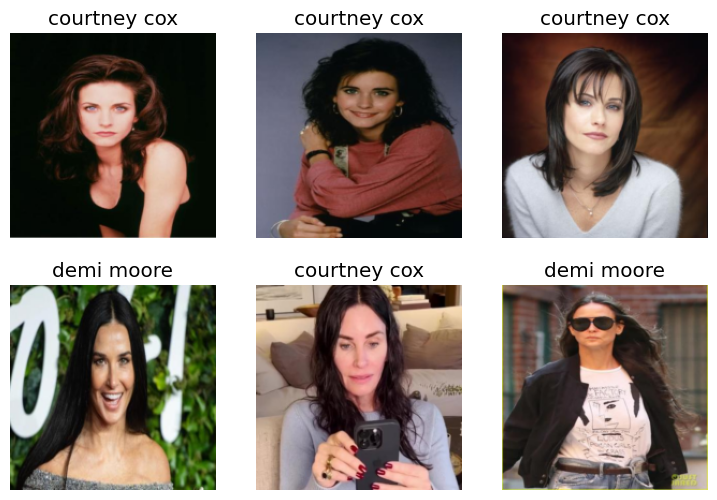

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files,

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that bird we downloaded at the start:

In [18]:
pred = learn.predict(PILImage.create('demi_moore.jpg'))
pred

('courtney cox', tensor(0), tensor([0.9769, 0.0231]))

This is: courtney cox.
Probability of prediction: 0.9769


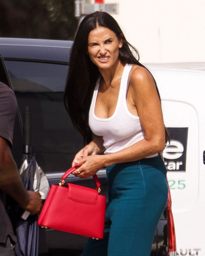

In [19]:
is_demi,_,probs = learn.predict(PILImage.create('demi_moore.jpg'))
print(f"This is: {is_demi}.")
print(f"Probability of prediction: {probs[_]:.4f}")
#print(f"Other Prob: {probs[1-_]:.4f}")
#print(f"dummy: {_}")
Image.open('demi_moore.jpg').to_thumb(256,256)

In [20]:
pred = learn.predict(PILImage.create('courtney_cox.jpg'))
pred

('courtney cox', tensor(0), tensor([9.9994e-01, 5.5339e-05]))

This is: courtney cox.
Probability of prediction: 0.9999


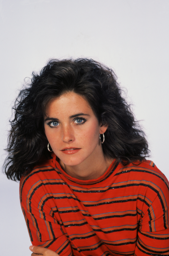

In [21]:
is_demi,_,probs = learn.predict(PILImage.create('courtney_cox.jpg'))
print(f"This is: {is_demi}.")
print(f"Probability of prediction: {probs[_]:.4f}")
#print(f"Other Prob: {probs[1-_]:.4f}")
#print(f"dummy: {_}")
Image.open('courtney_cox.jpg').to_thumb(256,256)

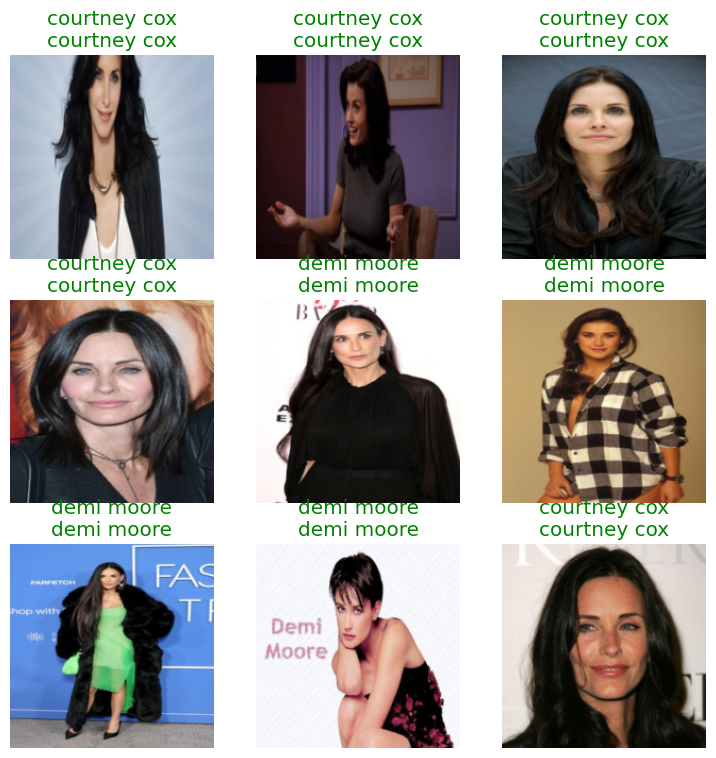

In [22]:
#mko add
learn.show_results()


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

SuggestedLRs(valley=0.0020892962347716093)

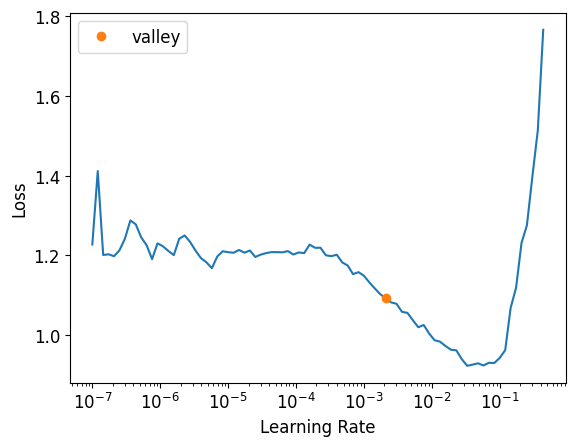

In [23]:

#mko
learn = vision_learner(dls, resnet18, metrics=error_rate)

#mko - find learning rate
learn.lr_find()
#mko looks like 0.001 might be optimal...anything smaller increases loss again - got stuck in local minima?
#but title ontop of graph is suggesting 0.0008


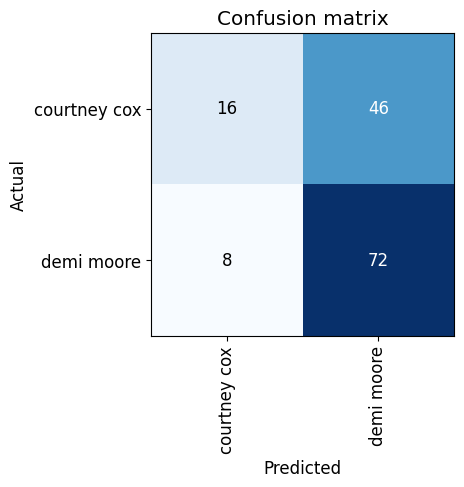

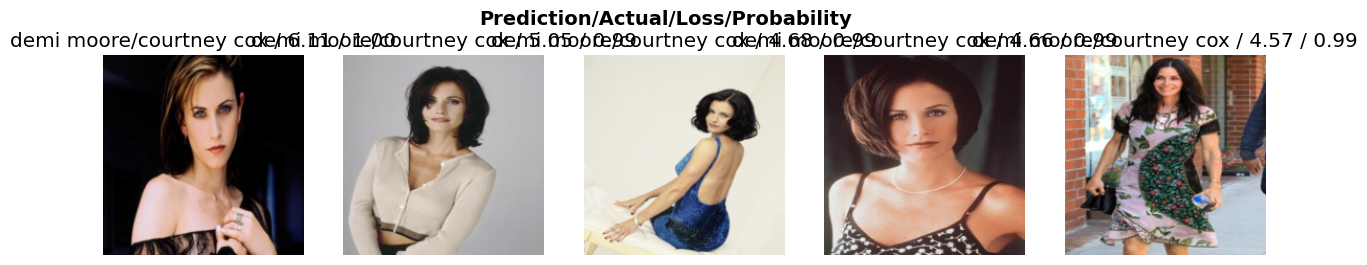

In [24]:

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)
cleaner = ImageClassifierCleaner(learn)
cleaner

In [25]:

#mko
interp.most_confused(min_val=2)


[('courtney cox', 'demi moore', 46), ('demi moore', 'courtney cox', 8)]

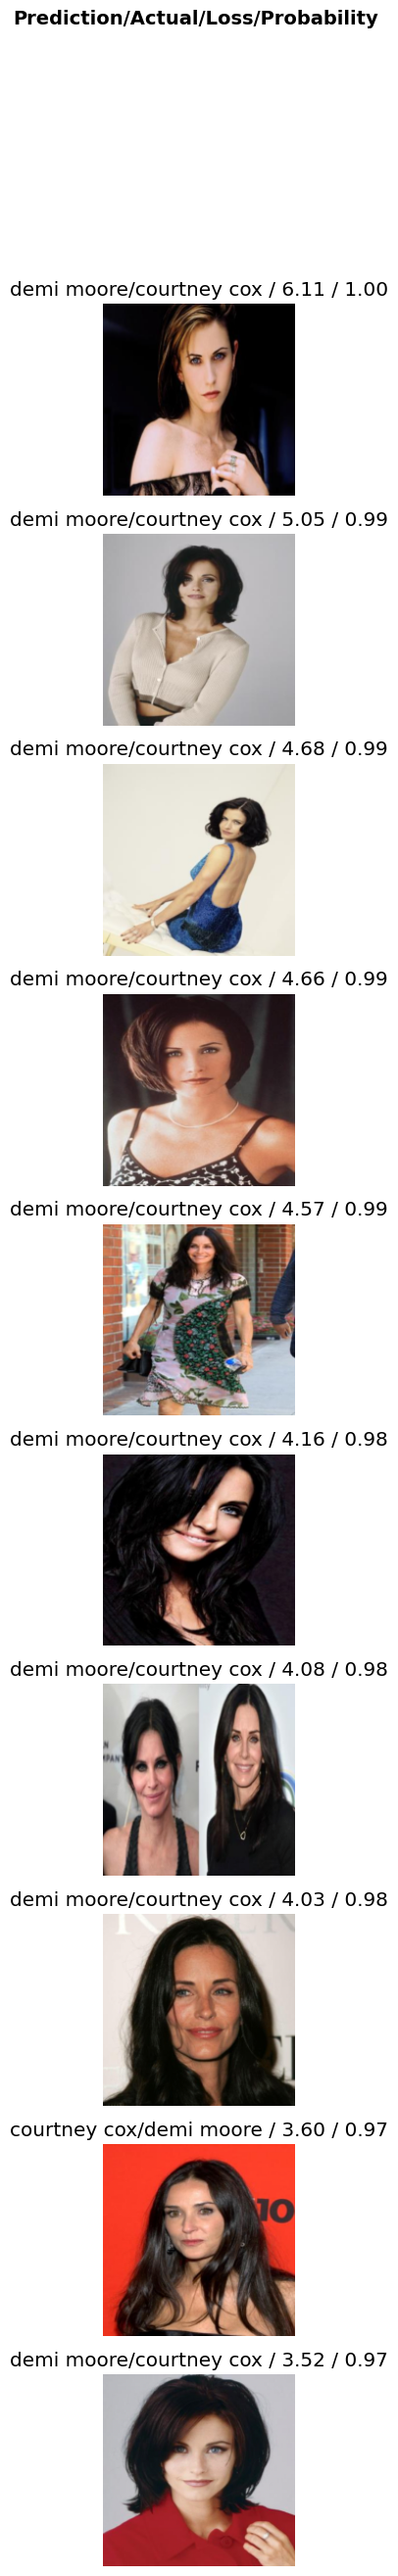

In [26]:
interp.plot_top_losses(10, nrows=10)

[('courtney cox', 'demi moore', 7), ('demi moore', 'courtney cox', 4)]

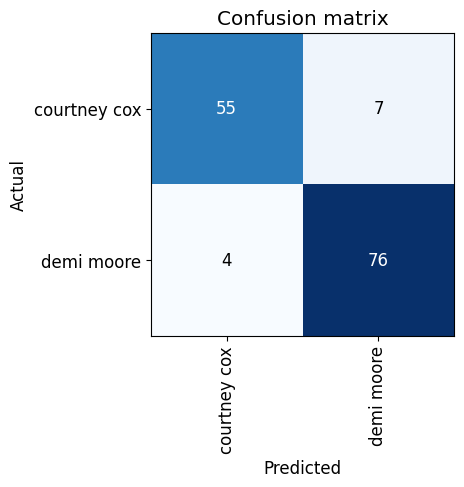

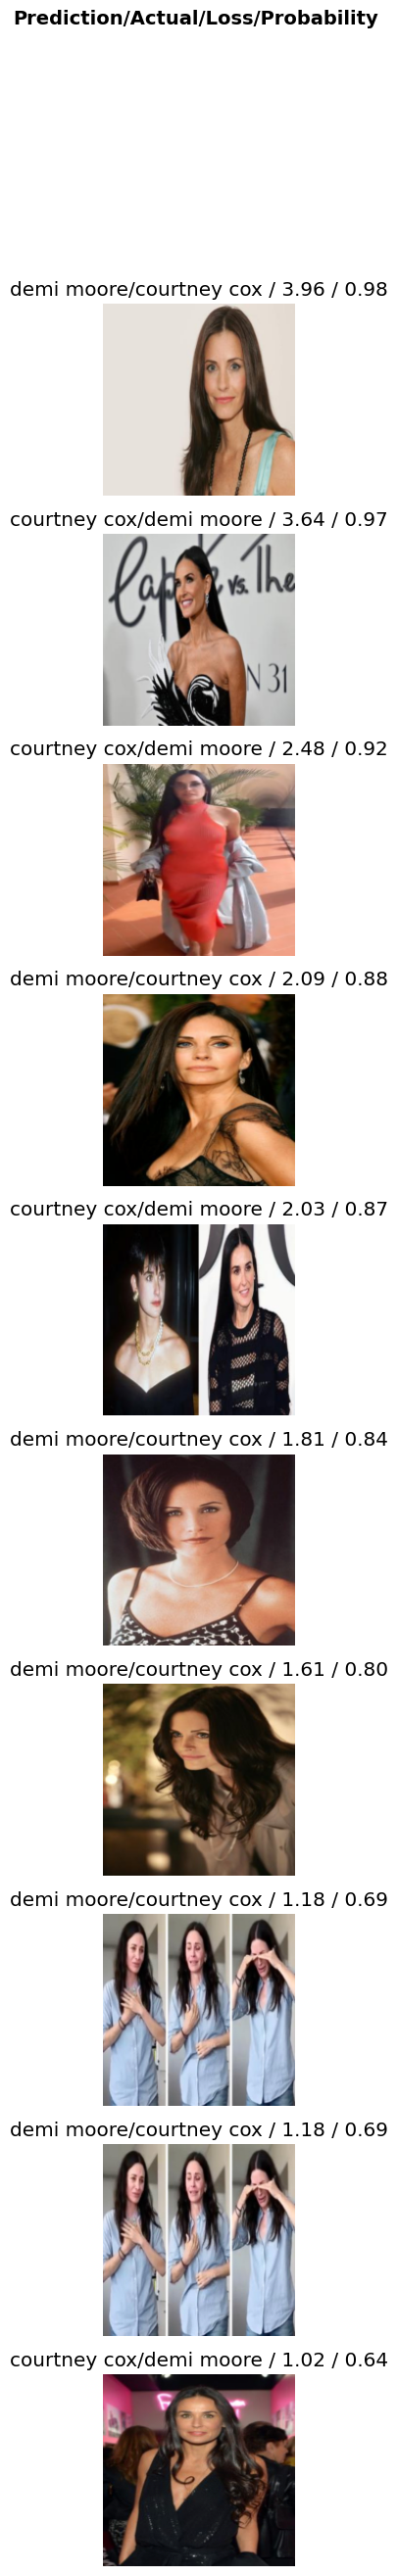

In [30]:
#mko - testing 0.002 as learning rate
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3, 0.002)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(10, nrows=10)
interp.most_confused(min_val=2)

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.